In [6]:
import cv2 as cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
from PIL import Image, ImageDraw, ImageFont
import os
import random


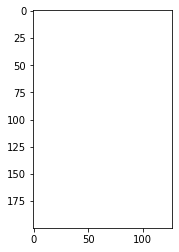

In [5]:
back_w = np.full([200, 128, 3],255, "uint8")

plt.imshow(back_w)

In [3]:
num = random.randint(0,19)
print(num)

14


In [7]:
def data_clean(data):
    re_data=[]
    for a in data:
        temp=re.sub('[a-zA-Z]','',a)
        temp=re.sub(':','',temp)
        temp=re.sub('[0-9]','',temp)
        temp=re.sub('[.]','',temp)
        temp=re.sub('[,]','',temp)
        temp=re.sub('[/]','',temp)
        temp=re.sub('[ ]','',temp)
        temp=re.sub('[-]','',temp)
        temp=re.sub('[!]','',temp)
        temp=re.sub('[?]','',temp)
        re_data.append(temp)
    return re_data

In [8]:
def cv_imread(file_path):
    cv_img = cv2.imdecode(np.fromfile(file_path,dtype=np.uint8),-1)
    return cv_img

In [9]:
def ch_word(img,str,x,y):
    imgPIL=Image.fromarray(cv2.cvtColor(img[128:,:],cv2.COLOR_BGR2RGB))
    draw=ImageDraw.Draw(imgPIL)
    font = ImageFont.truetype('C:\\Windows\\Fonts\\mingliu.ttc')
    draw.text((x,y),str,fill=(0,255,0),font=font)
    img2=cv2.cvtColor(np.asarray(imgPIL), cv2.COLOR_RGB2BGR)
    img[128:,:]=img2
    return img

In [11]:
csv_flie_path='./list/A117606類別推薦.csv'
csv_flie=pd.read_csv(csv_flie_path)
book_name=list(csv_flie['題名'])
book_write=list(csv_flie['作者'])
print(data_clean(book_name))

FileNotFoundError: [Errno 2] No such file or directory: './list/A117606類別推薦.csv'

In [12]:

back_w = np.full([200, 128, 3],255, "uint8")
img=cv_imread('./static/0.jpg')
img=img[:,:,::-1]
img=cv2.resize(img,(128,128))
back_w[:128,:]=img
book_n="作者:"
book_n+='管家其童話'
x1,y1=10,10
x2,y2=10,40
back_w=ch_word(back_w,book_n,x1,y1)
back_w=ch_word(back_w,book_n,x2,y2)

In [14]:
def pic(img_path, name, writer):
    back_w = np.full([200, 128, 3],255, "uint8")
    img = cv_imread(img_path)
    img = img[:, :, ::-1]
    img = cv2.resize(img, (128, 128))
    back_w[:128, :] = img
    book_wr = "作者"+writer
    book_n = "書名:"+name
    x1, y1 = 10, 10
    x2, y2 = 10, 40
    back_w = ch_word(back_w, book_n, x1, y1)
    back_w = ch_word(back_w, book_wr, x2, y2)
    return back_w
def pic_random(path):
    num = random.randint(0, 39)
    path_a = path + str(num)+'.jpg'
    return path_a
path = 'static/'
x = []
while True:
    path_a = pic_random(path)
    if path_a not in x:
        x.append(path_a)
        break
img = pic(path_a, "name", "writer")

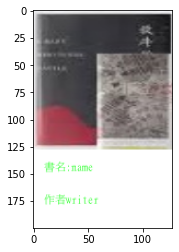

In [15]:
plt.imshow(img)

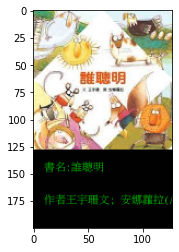

In [212]:
user_list=['A112558','A114720','A117606']
user_classification=['作者推薦','流行推薦','最愛推薦','類別推薦']
for user in user_list:
    for classification in user_classification:
        a=0
        csv_flie_path='./list/'+user+classification+'.csv'
        csv_flie=pd.read_csv(csv_flie_path)
        book_name=data_clean(list(csv_flie['題名']))
        book_write=list(csv_flie['作者'])
        for name,write in zip(book_name,book_write):
            back_w=np.ones((200,128,3),"uint8")
            path='./list/book_pic/'+name+'.jpg'
            img=cv_imread(path)
            img=img[:,:,::-1]
            img=cv2.resize(img,(128,128))
            back_w[:128,:]=img
            book_n="書名:"+name
            book_wr='作者'+ write
            x1,y1=10,10
            x2,y2=10,40
            back_w=ch_word(back_w,book_n,x1,y1)
            back_w=ch_word(back_w,book_wr,x2,y2)
            plt.imshow(back_w)
            if  classification=='作者推薦':
                path = './list/'+user+'writer'
            elif classification=='流行推薦':
                path = './list/'+user+'Popularity'
            elif classification=='最愛推薦':
                path = './list/'+user+'lover'
            elif classification=='類別推薦':
                path = './list/'+user+'class'
            if not os.path.isdir(path):
                os.mkdir(path)
            cv2.imwrite((path+'/'+str(a)+'.jpg'),back_w)
            a+=1

In [211]:
cv2.imwrite('./list/A112558/test.jpg',back_w)

True

In [207]:
a=0
csv_flie_path='./list/新書推薦.csv'
csv_flie=pd.read_csv(csv_flie_path)
book_name=data_clean(list(csv_flie['書名']))
book_write=list(csv_flie['作者'])
for name,write in zip(book_name,book_write):
    back_w = np.full([200, 128, 3],255, "uint8")
    path='./list/book_pic/'+name+'.jpg'
    img=cv_imread(path)
    img=img[:,:,::-1]
    img=cv2.resize(img,(128,128))
    back_w[:128,:]=img
    book_n="書名:"+name
    book_wr='作者'+ write
    x1,y1=10,10
    x2,y2=10,40
    back_w=ch_word(back_w,book_n,x1,y1)
    back_w=ch_word(back_w,book_wr,x2,y2)
    path = './list/newbook_recommend'
    if not os.path.isdir(path):
        os.mkdir(path)
    cv2.imwrite(path+'/'+str(a)+'.jpg',back_w)
    a+=1

In [181]:
path = './list/A112558'
if not os.path.isdir(path):
    os.mkdir(path)
cv2.imwrite('./list/A112558/test.jpg',img)

True